# Sentiment analysis with Python
In this class we will:

- Extract twitter data using tweepy and learn how to handle it using pandas.
- Do some basic statistics and visualizations with numpy, matplotlib and seaborn.
- Do sentiment analysis of extracted (Trump's) tweets using textblob.

The requirements are:

- NumPy: This is the fundamental package for scientific computing with Python. Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data.
- Pandas: This is an open source library providing high-performance, easy-to-use data structures and data analysis tools.
- Matplotlib: This is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.
- Seaborn: This is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
- Tweepy: This is an easy-to-use Python library for accessing the Twitter API.
- Textblob: This is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks.

All of them can be installed through *pip*. 

## 1. Extracting twitter data (tweepy + pandas)
### 1.1. Importing our libraries

In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.2. Creating a Twitter App

In order to extract tweets for a posterior analysis, we need to access to our Twitter account and create an app. The website to do this is https://apps.twitter.com/. 

From this app that we're creating we will save the following information in a new cell that contains:

- Consumer Key (API Key)
- Consumer Secret (API Secret)
- Access Token
- Access Token Secret

In [2]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'YuFqL7bCSDHhLlbAzFvF02gcE'
CONSUMER_SECRET = 'lr4MIHgghusgPSBZQ7VroKYaw3dDKfRvr4EzxJ1LS9QlrengWz'

# Access:
ACCESS_TOKEN  = '241206928-9tsIA2LyOqKOaLG5IHmswv09ghiubyBh4xfkJRXh'
ACCESS_SECRET = 'mVXf7ds0iPSkOkB0FK5RiUBu25qZGpxXxBD7AJ7wAItdJ'

We will now setup the Twitter API

In [3]:
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

So far, so easy right? We're now ready to extract tweets in the next section.

### 1.3. Tweets extraction

Now that we've created a function to setup the Twitter API, we can use this function to create an "**extractor**" object. After this, we will useTweepy's function `extractor.user_timeline(screen_name, count)` to extract from `screen_name`'s user the quantity of `count` tweets.

I've chosen <a href="https://twitter.com/realDonaldTrump">@realDonaldTrump</a> as the user to extract data for a posterior analysis. Yeah, we wanna keep it interesting :)

The way to extract Twitter's data is as follows:

In [4]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

Very little discussion of all the purposely false and defamatory stories put out this week by the Fake News Media.… https://t.co/R8tTxg9AvK

Getting closer and closer on the Tax Cut Bill. Shaping up even better than projected. House and Senate working very… https://t.co/fKLVfqSmsK

Things are going really well for our economy, a subject the Fake News spends as little time as possible discussing!… https://t.co/hZfaovKX9L

No American should be separated from their loved ones because of preventable crime committed by those illegally in… https://t.co/leuQTYO8zk

Great Army - Navy Game. Army wins 14 to 13 and brings home the COMMANDER-IN-CHIEF’S TROPHY! Congratulations!



### 1.4. Creating a Pandas DataFrame
We now have initial information to construct a Pandas `DataFrame`, in order to manipulate the info in a very easy way.

IPython's `display` function plots an output in a friendly way, and the `head` method of a dataframe allows us to visualize the first 5 elements of the dataframe (or the first number of elements that are passed as an argument).

So, using Python's list comprehension:

In [5]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,Very little discussion of all the purposely fa...
1,Getting closer and closer on the Tax Cut Bill....
2,"Things are going really well for our economy, ..."
3,No American should be separated from their lov...
4,Great Army - Navy Game. Army wins 14 to 13 and...
5,.@daveweigel of the Washington Post just admit...
6,.@DaveWeigel @WashingtonPost put out a phony p...
7,"Have a great game today, @USArmy and @USNavy -..."
8,It was my great honor to celebrate the opening...
9,Heading to the great state of Mississippi at t...


So we now have a nice table with ordered data.

An interesting thing is the number if internal methods that the `tweet` structure has in Tweepy:

In [6]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


The interesting part from here is the quantity of metadata contained in a single tweet. If we want to obtain data such as the creation date, or the source of creation, we can access the info with this attributes. An example is the following:

In [7]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

939967625362276354
2017-12-10 21:18:40
Twitter for iPhone
76675
20246
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/R8tTxg9AvK', 'expanded_url': 'https://twitter.com/i/web/status/939967625362276354', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [116, 139]}]}


We're now able to order the relevant data and add it to our dataframe.

### 1.5. Adding relevant info to our dataframe

As we can see, we can obtain a lot of data from a single tweet. But not all this data is always useful for specific stuff. In our case we well just add some data to our dataframe. For this we will use Pythons list comprehension and a new column will be added to the dataframe by just simply adding the name of the content between square brackets and assign the content. The code goes as follows:

In [8]:
# We add relevant data:
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

And to display again the dataframe to see the changes, we just need to run the following code:

In [9]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,Very little discussion of all the purposely fa...,139,939967625362276354,2017-12-10 21:18:40,Twitter for iPhone,76675,20246
1,Getting closer and closer on the Tax Cut Bill....,140,939851058788134913,2017-12-10 13:35:28,Twitter for iPhone,75347,14986
2,"Things are going really well for our economy, ...",140,939849867438034944,2017-12-10 13:30:44,Twitter for iPhone,101052,23477
3,No American should be separated from their lov...,139,939680422493073408,2017-12-10 02:17:25,Media Studio,105906,29985
4,Great Army - Navy Game. Army wins 14 to 13 and...,108,939642796289470464,2017-12-09 23:47:55,Twitter for iPhone,84584,14249
5,.@daveweigel of the Washington Post just admit...,140,939634404267380736,2017-12-09 23:14:34,Twitter for iPhone,80458,22435
6,.@DaveWeigel @WashingtonPost put out a phony p...,140,939616077356642304,2017-12-09 22:01:44,Twitter for iPhone,67294,22184
7,"Have a great game today, @USArmy and @USNavy -...",140,939564681743814661,2017-12-09 18:37:31,Twitter for iPhone,48212,10332
8,It was my great honor to celebrate the opening...,143,939560154269405184,2017-12-09 18:19:31,Twitter for iPhone,59249,13735
9,Heading to the great state of Mississippi at t...,140,939521466634326016,2017-12-09 15:45:47,Twitter for iPhone,54894,10147


Now that we have extracted and have the data in a easy-to-handle ordered way, we're ready to do a bit more of manipulation to visualize some plots and gather some statistical data. The first part of the post is done.

## 2. Visualization and basic statistics
### 2.1. Averages and popularity

We first want to calculate some basic statistical data, such as the mean of the length of characters of all tweets, the tweet with more likes and retweets, etc.

From now, I'll just add some input code and the output right below the code.

To obtain the mean, using numpy:

In [10]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 124.335


To extract more data, we will use some Pandas' functionalities:

In [11]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Now that the three basketball players are out of China and saved from years in jail, LaVar Ball, the father of LiAn… https://t.co/371qJ1biwh
Number of likes: 275231
140 characters.

The tweet with more retweets is: 
Now that the three basketball players are out of China and saved from years in jail, LaVar Ball, the father of LiAn… https://t.co/371qJ1biwh
Number of retweets: 76870
140 characters.



This is common, but it won't necessarily happen: the tweet with more likes is the tweet with more retweets. What we're doing is that we find the maximum number of likes from the '*Likes*' column and the maximum number of retweets from the '*RTs*' using numpy's `max` function. With this we just look for the index in each of both columns that satisfy to be the maximum. Since more than one could have the same number of likes/retweets (the maximum) we just need to take the first one found, and that's why we use `.index[0]` to assign the index to the variables `fav` and `rt`. To print the tweet that satisfies, we access the data in the same way we would access a matrix or any indexed object.

We're now ready to plot some stuff :)

### 2.2. Time series

Pandas has its own object for time series. Since we have a whole vector with creation dates, we can construct time series respect tweets lengths, likes and retweets.

The way we do it is:

In [12]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

And if we want to plot the time series, Pandas already has its own method in the object. We can plot a time series as follows:

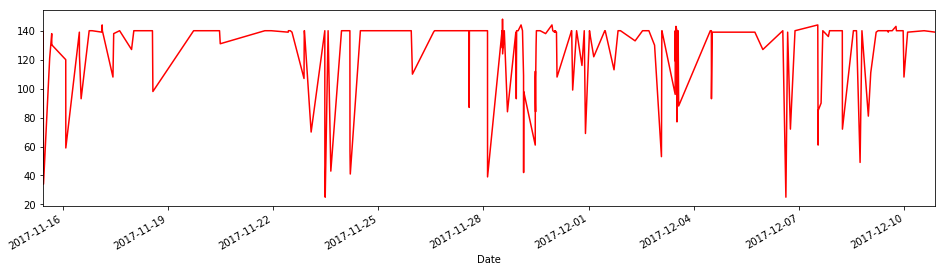

In [13]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

And to plot the likes versus the retweets in the same chart:

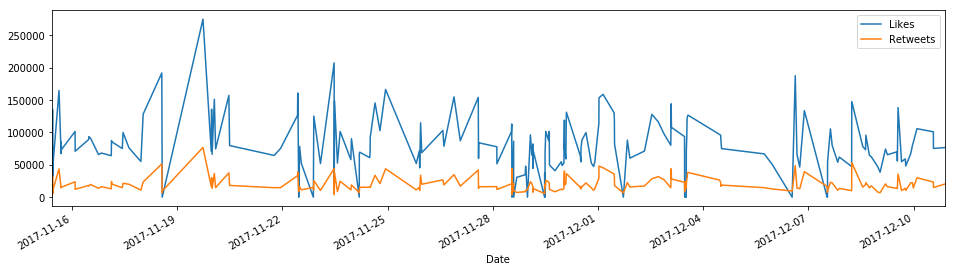

In [14]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

### 2.3. Pie charts of sources

We're almost done with this second section of the post. Now we will plot the sources in a pie chart, since we realized that not every tweet is tweeted from the same source (😱🤔). We first clean all the sources:

In [15]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Media Studio
* Twitter for iPad
* Twitter Web Client


We now count the number of each source and create a pie chart.

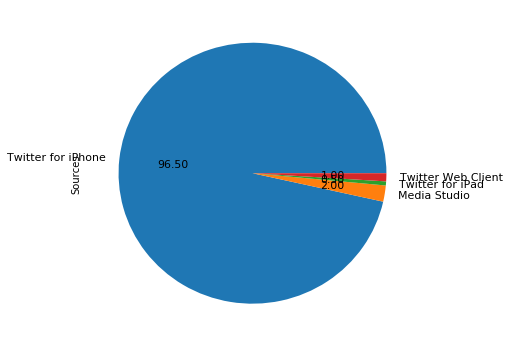

In [16]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

The plot shows us the percentage of tweets per source.

We can now proceed to do sentiment analysis.

## 3. Sentiment analysis
### 3.1. Importing textblob

As we mentioned at the beginning of this post, textblob will allow us to do sentiment analysis in a very simple way. We will also use the `re` library from Python, which is used to work with *regular expressions*. For this, I'll provide you two utility functions to: a) clean text (which means that any symbol distinct to an alphanumeric value will be remapped into a new one that satisfies this condition), and b) create a classifier to analyze the polarity of each tweet after cleaning the text in it. I won't explain the specific way in which the function that cleans works, since it would be extended and it might be better understood in the <a href="https://docs.python.org/3/library/re.html">official re documentation</a>.

TextBlob has two sentiment analyzers. First is `PatternAnalyzer` and second is `NaiveBayesAnalyzer`. The default implementation is `PatternAnalyzer`, but you can override the analyzer by passing another implementation into a TextBlob’s constructor. The output returned by the two analyzers is different: the first returns two attributes, `polarity` (in the range [-1.0, 1.0]) and `subjectivity` (in the range [0.0, 1.0], where 0.0 is very objective and 1.0 is very subjective). The NaiveBayesAnalyzer returns its result as a namedtuple of the form: Sentiment(classification, p_pos, p_neg). Note: to run the `NaiveBayesAnalyzer`, you might have to download some additional corpora to train the classifier, with the following command `python -m textblob.download_corpora`.

The code using is the following:

In [17]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer #Only necessary if you want to override the analyzer

import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
    
def analyze_sentiment_NB(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet), analyzer=NaiveBayesAnalyzer())
    if analysis.sentiment.classification == 'pos':
        return 1
    elif analysis.sentiment.classification == 'neg':
        return -1
    else:
        return 0

The way it works is that textblob already provides a trained analyzer (cool, right?). Textblob can work with different *machine learning* models used in *natural language processing*. If you want to train your own classifier (or at least check how it works) feel free to check the following <a href="https://textblob.readthedocs.io/en/dev/classifiers.html">link</a>. It might result relevant since we're working with a pre-trained model (for which we don't know the data that was used).

Anyway, getting back to the code we will just add an extra column to our data. This column will contain the sentiment analysis and we can plot the dataframe to see the update:

In [18]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analyze_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Very little discussion of all the purposely fa...,139,939967625362276354,2017-12-10 21:18:40,Twitter for iPhone,76675,20246,-1
1,Getting closer and closer on the Tax Cut Bill....,140,939851058788134913,2017-12-10 13:35:28,Twitter for iPhone,75347,14986,1
2,"Things are going really well for our economy, ...",140,939849867438034944,2017-12-10 13:30:44,Twitter for iPhone,101052,23477,-1
3,No American should be separated from their lov...,139,939680422493073408,2017-12-10 02:17:25,Media Studio,105906,29985,1
4,Great Army - Navy Game. Army wins 14 to 13 and...,108,939642796289470464,2017-12-09 23:47:55,Twitter for iPhone,84584,14249,1
5,.@daveweigel of the Washington Post just admit...,140,939634404267380736,2017-12-09 23:14:34,Twitter for iPhone,80458,22435,-1
6,.@DaveWeigel @WashingtonPost put out a phony p...,140,939616077356642304,2017-12-09 22:01:44,Twitter for iPhone,67294,22184,-1
7,"Have a great game today, @USArmy and @USNavy -...",140,939564681743814661,2017-12-09 18:37:31,Twitter for iPhone,48212,10332,1
8,It was my great honor to celebrate the opening...,143,939560154269405184,2017-12-09 18:19:31,Twitter for iPhone,59249,13735,1
9,Heading to the great state of Mississippi at t...,140,939521466634326016,2017-12-09 15:45:47,Twitter for iPhone,54894,10147,1


As we can see, the last column contains the sentiment analysis (`SA`). We now just need to check the results.

### 3.2. Analyzing the results

To have a simple way to verify the results, we will count the number of neutral, positive and negative tweets and extract the percentages.

In [19]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

Now that we have the lists, we just print the percentages:

In [20]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 54.5%
Percentage of neutral tweets: 22.0%
Percentage de negative tweets: 23.5%


We have to consider that we're working only with the 200 most recent tweets from D. Trump. For more accurate results we can consider more tweets. An interesting thing (an invitation to you) is to analyze the polarity of the tweets from different sources, it might be deterministic that by only considering the tweets from one source the polarity would result more positive/negative. Anyway, I hope this resulted interesting.

As we saw, we can extract, manipulate, visualize and analyze data in a very simple way with Python. 

## Exercises
1. Consider the tweets published in your own timeline (http://tweepy.readthedocs.io/en/v3.5.0/getting_started.html#hello-tweepy) and analyze their sentiments. This will help you capture with what content you get in touch with. Is it more positive-, neutral-, or negative-oriented?

2. Consider the last 100 tweets that contain a keyword of your interest (http://docs.tweepy.org/en/latest/api.html#API.search) and analyze the lenght of their tweets, and the number of likes and retweets, and their sentiments. How are the sentiments over the keyword distributed?

3. Consider the last 300 tweets that contain a location of your interest and analyze the lenght of their tweets, and the number of likes and retweets, and their sentiments. How are the sentiments of the users in that location?

4. When you mention another user (http://docs.tweepy.org/en/latest/api.html#API.mentions_timeline), with which sentiments do you do it?

5. Consider the last 200 tweets of two users you consider similar or relatable and compare the lenght of their tweets, and the number of likes and retweets. For each aspect we are considering (i.e., lenght, likes, and retwets) show one plot to compare the time series of those two users. Are the sentiments of the tweets of these two users distributed in similar ways?

6. Repeat exercise 5 with two users you consider very different (e.g., Donald Trump and Hillary Clinton). Be creative with the choices :)

7. Write a function to return if a tweet is more objective or subjective and run it in all the examples of the previous exercises (plus the Trump example we made during the class).